### Setup

In [260]:
pip install --user --upgrade google-cloud-language

Note: you may need to restart the kernel to use updated packages.


In [261]:
%matplotlib inline
! pip install --user pandas
! pip install --user numpy
! pip install --user matplotlib

#### Set up functions to call Google Natural Language API
Sentiment Analysis:

In [262]:
import utils
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
# suppress warning
import warnings
warnings.filterwarnings("ignore")

In [263]:
# visualization (code test) 
def text_sentiment_line_chart(df_sentiment_score):
    df_sentiment_score.plot(kind='line', y='sentiment score', x=df_sentiment_score.index+1)
    
    #set the size

    # Build the chart graphic
    ax = plt.axes()
    ax.grid()
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axhspan(0, 2.0, facecolor='bisque', alpha=0.5)
    ax.axhspan(-2.0, 0, facecolor='lightcoral', alpha=0.5)

    # Giving y label using xlabel() method 
    plt.ylabel("Sentiment Score", fontweight='bold')  
    plt.xlabel("Number of Sentences", fontweight='bold')  
    # Giving title to the plot
    plt.title("Sentiment Score by Sentence", fontweight='bold')
    
    plt.rcParams['figure.figsize'] = [9.27, 5.73]
    
    plt.show()

In [264]:
def process_one_file(file_name):
    df_sentiment_score = utils.get_basic_info(file_name)
    text_sentiment_line_chart(df_sentiment_score)

In [265]:
def getSentimentByLanguage (df_de, df_en):
    x1=list(range(len(df_de)))
    y1=df_de

    x2=list(range(len(df_en)))
    y2=df_en

    # plotting the line 1 points 
    plt.plot(x1, y1, label = "DE")
    # plotting the line 2 points 
    plt.plot(x2, y2, label = "EN")

    #set the graphic size
    plt.rcParams['figure.figsize'] = [9.27, 5.73]

    # Build the chart graphic
    ax = plt.axes()
    ax.grid()
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axhspan(0, 2.0, facecolor='bisque', alpha=0.5)
    ax.axhspan(-2.0, 0, facecolor='lightcoral', alpha=0.5)

    # Set the XY axis labels of the current axis.
    plt.xlabel('Number Of Sentences', fontweight='bold')
    plt.ylabel('Sentiment Score', fontweight='bold')
    # Set a title of the current axes.
    plt.title('Sentiment Score By Sentence', fontweight='bold')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()

<p style="font-size: 36px;font-family: Georgia, serif;background-color:#DEE9FA">
    <font color="#0E60DA"><b>NLP Code Study Demo</b></font><br>
    <font color="#0E60DA" size=5><b>Analyze DB News Articles' Sentiment and Visualize the result</b></font>
</p>    


<b><p style="font-size: 24px;font-family: Georgia, serif;background-color:#D6E1F1 ">
    <font color="#1259B7">Demo 1 - Process a single news article</font><br>
    <font color="#1259B7" size=3>
        1. Basic statistic of the article<br>
        2. Visualization - Sentiment score line chart by sentence
     </font>
</p>
</b>    
Input: 1 file name
Output: basic info and Sentiment Score Chart for one file

There are total of  25  sentences in the artical.


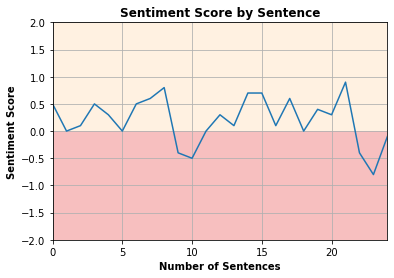

In [7]:
process_one_file("news1.txt")

<b><p style="font-size: 24px;font-family: Georgia, serif;background-color:#D6E1F1 ">
    <font color="#1259B7">Demo 2 - Comparing the same article in two languages</font><br>
    <font color="#1259B7" size=3>
        1. Basic statistic of the articles<br>
        2. Visualization - Sentiment score line chart by sentences
     </font>
</p>
</b>    
Input: LIST of file names
Output: Sentiment Score Chart for both language

There are total of  31  sentences in the artical.
There are total of  25  sentences in the artical.


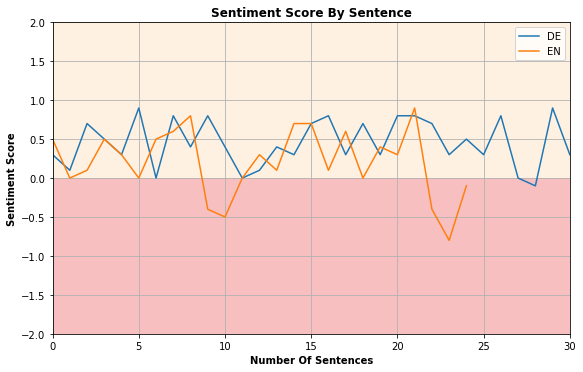

In [8]:
# get the two sets of analysis results
df_de = utils.get_basic_info("news_de_1.txt")
df_en = utils.get_basic_info("news1.txt")
# Visualize the results:
getSentimentByLanguage (df_de, df_en)

<b><p style="font-size: 24px;font-family: Georgia, serif;background-color:#D6E1F1 ">
    <font color="#1259B7">In Progress</font><br>
    <font color="#1259B7" size=3>
        A. Scraping articles automatically from DB news<br>
        B. Process multiple news article<br>
        C. Flask integration to expose results on HTML (https://neon-infinity-308411.ew.r.appspot.com/) <br>
        D. Incoporate more analytical results and visualization<br>
     </font>
</p>
</b>    

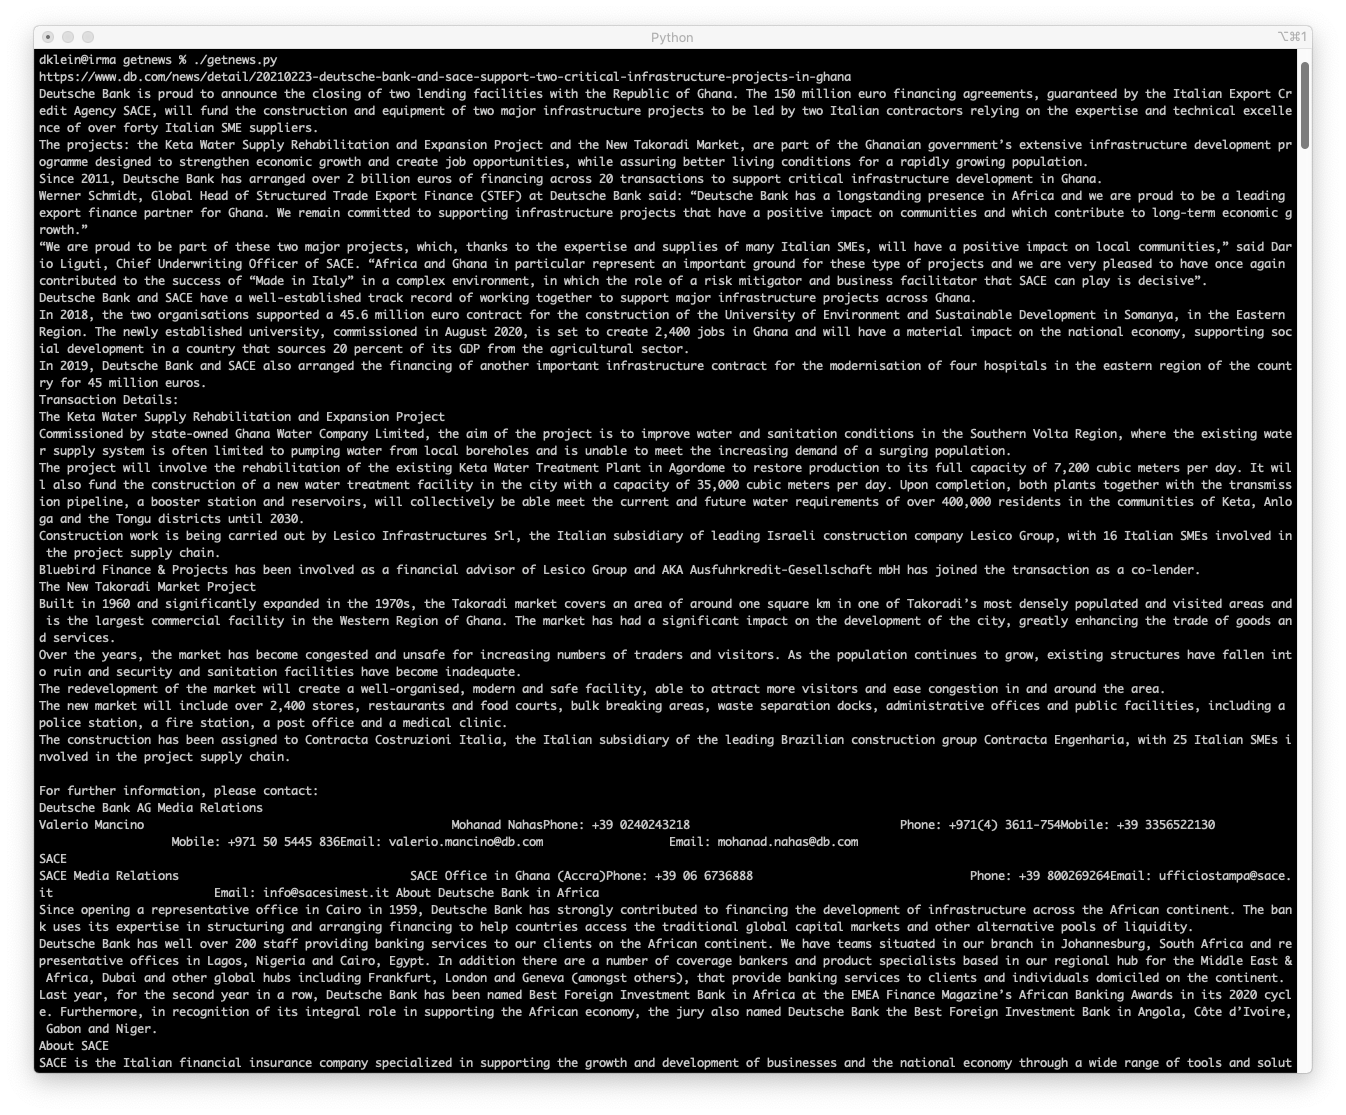

In [258]:
# A. Scraping articles automatically from DB news
from IPython.display import Image
Image(filename='../getnews/getnews.png') 

In [ ]:
Image(filename='tempsnip.png') 

In [9]:
# B. Process multiple news article
file_name_list = ['news1.txt', 'news2.txt', 'news3.txt']

There are total of  25  sentences in the artical.


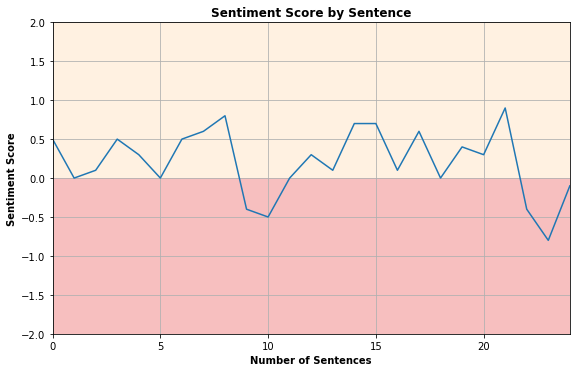

There are total of  18  sentences in the artical.


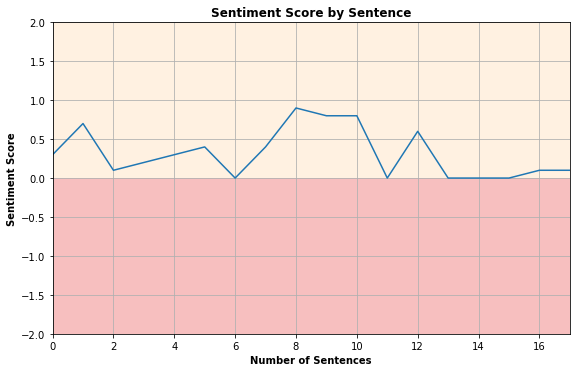

There are total of  26  sentences in the artical.


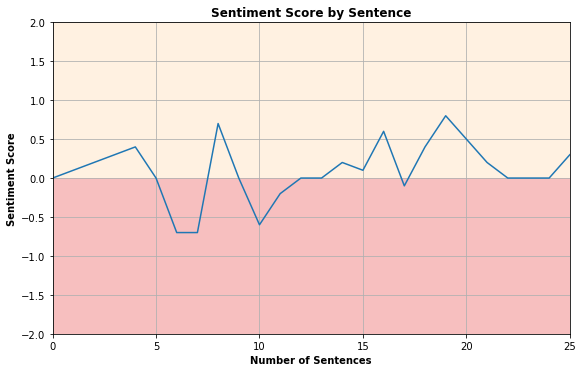

In [10]:
#print(file_name_list[0])
for x in file_name_list:
  process_one_file(x)

<p style="font-size: 36px;font-family: Georgia, serif;background-color:#DEE9FA">
    <font color="#0E60DA"><b>THE END :-)</b></font><br>
</p>  

# Testing code

In [ ]:
dict_files = {
    "en": ["news1.txt"],
    "de":["news_de_1.txt"]
}
for x, y in dict_files.items():
    file_name = y[0]
    file_lang = x
    print(file_name,file_lang)

In [ ]:
#Get basic information for one file 2 languages
def get_basic_info2(file_info):
    for lang, fname in file_info.items():
        file_name = fname[0]
        file_lang = lang
        #print(file_name,file_lang)
        text = utils.get_text_from_file (file_name)
        #create the result into dataframe for further info
        df_text_sentiment_stats = utils.save_sentiment_to_df(text)
        df_text_sentiment_stats.reset_index(inplace=True)
        df_text_sentiment_stats.append(df_text_sentiment_stats)
    
    return df_text_sentiment_stats

In [ ]:
# visualization (code test) 
def text_sentiment_line_chart2(ls_df_sentiment_score):
    df_sentiment_score = get_basic_info2(dict_files)['sentiment score']
    df_sentiment_score.plot(kind='line', y='sentiment score', x=df_sentiment_score.index+1)
    # Build the chart graphic
    ax = plt.axes()
    ax.grid()
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axhspan(0, 2.0, facecolor='bisque', alpha=0.5)
    ax.axhspan(-2.0, 0, facecolor='lightcoral', alpha=0.5)

    # Giving y label using xlabel() method 
    plt.ylabel("Sentiment Score", fontweight='bold')  
    plt.xlabel("Number of Sentences", fontweight='bold')  
    # Giving title to the plot
    plt.title("Sentiment Score by Sentence", fontweight='bold')
    
    plt.rcParams['figure.figsize'] = [9.27, 5.73]
    
    plt.show()

In [ ]:
process_two_language(dict_files)

In [ ]:
def process_two_language(file_info):
    df_sentiment_score = get_basic_info2(file_info)
    text_sentiment_line_chart2(df_sentiment_score)

In [ ]:
dict_files = {
    "en": ["news1.txt", "news2.txt", "news3.txt"],
    "de":["news_de_1.txt", "news_de_2.txt", "news_de_3.txt"]
}